# Field operations 1

In this tutorial, we show some mathematical operations that can be performed on field objects in Ubermag. Fot that, we are going to use a skyrmion example.

Running OOMMF (ExeOOMMFRunner) [2020/07/02 13:24]... (2.4 s)


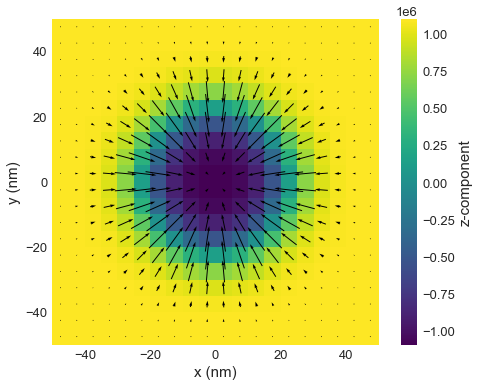

In [48]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9), bc='xy')

system = mm.System(name='skyrmion')

system.energy = (mm.Exchange(A=1.6e-11)
               + mm.DMI(D=4e-3, crystalclass='Cnv') 
               + mm.UniaxialAnisotropy(K=0.2e6, u=(0, 0, 1)) 
               + mm.Zeeman(H=(0, 0, 1e5)))

def m_init(point):
    x, y, z = point
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)

system.m = df.Field(mesh, dim=3, value=m_init, norm=1.1e6)

# minimize the energy
md = mc.MinDriver()
md.drive(system)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

The magnetisation field is in `system.m`. To access a numpy array of a magnetisation field:

In [49]:
system.m.array

array([[[[   1577.02185283,    1577.02185283, 1099997.73909047],
         [   1577.02185283,    1577.02185283, 1099997.73909047]],

        [[   2131.76347421,    4844.39139977, 1099987.26695197],
         [   2131.76347421,    4844.39139977, 1099987.26695197]],

        [[   3355.14447758,    8389.23388935, 1099962.8919924 ],
         [   3355.14447758,    8389.23388935, 1099962.8919924 ]],

        ...,

        [[   3355.14447758,   -8389.23388935, 1099962.8919924 ],
         [   3355.14447758,   -8389.23388935, 1099962.8919924 ]],

        [[   2131.76347421,   -4844.39139977, 1099987.26695197],
         [   2131.76347421,   -4844.39139977, 1099987.26695197]],

        [[   1577.02185283,   -1577.02185283, 1099997.73909047],
         [   1577.02185283,   -1577.02185283, 1099997.73909047]]],


       [[[   4844.39139977,    2131.76347421, 1099987.26695197],
         [   4844.39139977,    2131.76347421, 1099987.26695197]],

        [[   6624.80395466,    6624.80395466, 1099960.101069

This exposes the field to `numpy` and all operations present in numpy can be used. However, there are a lot of convenience functions, which are part of the `Field` object.

To get an individual component:

In [50]:
system.m.x

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), bc='xy', subregions={}), dim=1)

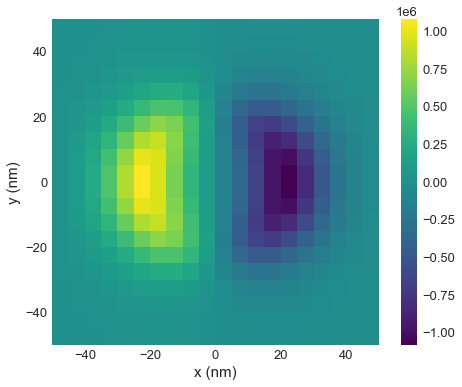

In [51]:
system.m.x.plane('z').mpl()

In [52]:
system.m.y

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), bc='xy', subregions={}), dim=1)

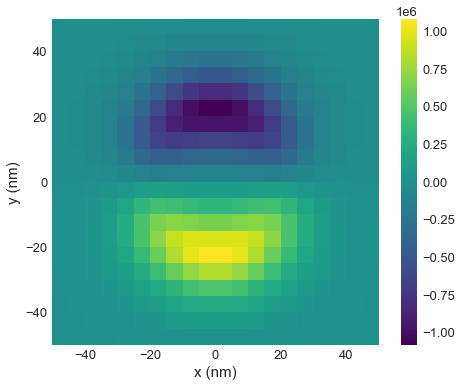

In [53]:
system.m.y.plane('z').mpl()

In [54]:
system.m.z

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), bc='xy', subregions={}), dim=1)

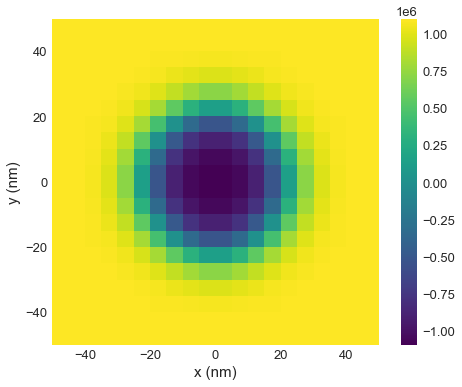

In [55]:
system.m.z.plane('z').mpl()

The magnetisation is by default not normalised.

In [56]:
system.m.average

(8.851088750816416e-12, 8.783445082372055e-12, 750239.3999862953)

To get normalised magnetisation:

$$\mathbf{m} = \frac{\mathbf{M}}{M_\text{s}}$$

In [57]:
system.m.orientation

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), bc='xy', subregions={}), dim=3)

In [58]:
system.m.orientation.average

(9.815282267511272e-18, 7.784571598445922e-18, 0.6820358181693598)

Just like we can get the normalised magnetisation, we can get the norm itself.

In [97]:
abs(system.m)

Field(mesh=Mesh(region=Region(p1=(-5e-08, -5e-08, 0.0), p2=(5e-08, 5e-08, 1e-08)), n=(20, 20, 2), bc='xy', subregions={}), dim=1)

## Algebra operations

Let us define two fields:

In [60]:
region = df.Region(p1=(0, 0, 0), p2=(10e-9, 10e-9, 10e-9))
mesh = df.Mesh(region=region, n=(10, 10, 10))

f1 = df.Field(mesh, dim=3, value=(1, 1, 0))
f2 = df.Field(mesh, dim=3, value=(2, 1, 3))

In [61]:
f1.average

(1.0, 1.0, 0.0)

In [62]:
f2.average

(2.0, 1.0, 3.0)

### `+` operation

In [63]:
f1 + f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

In [64]:
(f1 + f2).average

(3.0, 2.0, 3.0)

### `-` operation

In [65]:
f1 - f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

In [66]:
(f1 - f2).average

(-1.0, 0.0, -3.0)

### `*` operation

Basic multiplication is not defined between vector fields. In that case, we perform either dot or cross product, which we are going to discuss later.

In [67]:
# NBVAL_SKIP
f1 * f2  # both are vector fields

ValueError: Cannot apply operator * on dim=3 and dim=3 fields.

Scalar with vector field:

In [68]:
f1.x * f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

Scalar with vector field:

In [69]:
f1.x * f2.y

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=1)

### `/` operation

In [70]:
# NBVAL_SKIP
f1 / f2  # both are vector fields

ValueError: Cannot apply ** operator on dim=3 field.

Dividing vector field by a scalar field:

In [71]:
f1 / f2.x

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

Scalar field divided by vector field is not allowed:

In [72]:
# NBVAL_SKIP
f2.x / f1

ValueError: Cannot apply ** operator on dim=3 field.

### `**` operator

This operator is allowed only on scalar fields:

In [73]:
# NBVAL_SKIP
f1 ** 2

ValueError: Cannot apply ** operator on dim=3 field.

In [74]:
f1.x ** 2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=1)

### Compund operations

In [75]:
f1 += f2

In [76]:
f1 -= f2

In [77]:
f1 *= f2.x

In [78]:
f2 /= f2.y

## Vector products

As the title says, these products are applied between vector fields only.

### Dot product

Dot product is implemented through `@` operator:

In [79]:
f1 @ f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=1)

### Cross product

Cross product between vector fields is performed using `&` operator:

In [80]:
f1 & f2

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

## Vector calculus

### Directional derivative $\left(\frac{\partial}{\partial x_{i}}f\right)$

Defined on both scalar and vector fields:

In [81]:
f1.derivative('x')

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

### Gradient $(\nabla f)$

Defined on scalar fields:

In [82]:
f1.x.grad

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

### Divergence $(\nabla \cdot f)$

Defined on vector fields:

In [83]:
f1.div

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=1)

### Curl  $(\nabla \times f)$

Defined on vector fields:

In [84]:
f1.curl

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

### Laplace operator $(\nabla^{2} f)$

Defined on both vector and scalar fields:

In [85]:
f1.laplace

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=3)

In [86]:
f1.x.laplace

Field(mesh=Mesh(region=Region(p1=(0.0, 0.0, 0.0), p2=(1e-08, 1e-08, 1e-08)), n=(10, 10, 10), bc='', subregions={}), dim=1)

## Integrals

### Volume integral $\left(\int_{V}fdV\right)$

In [87]:
f1.volume_integral

(2.0000000000000002e-24, 2.0000000000000002e-24, 0.0)

### Surface integral

In order to compute a surface integral, we have to define the surface (`plane`):

In [88]:
f1.plane('z').surface_integral

(2.0000000000000002e-16, 2.0000000000000002e-16, 0.0)

## Operation pipelines

In [89]:
f1.x.grad.div.grad.curl.y.grad.volume_integral

(0.0, 0.0, 0.0)

## Example

Here we implement skyrmion number calculations using operations on fields:

$$S = \frac{1}{4\pi} \int \mathbf{m} \cdot \left(\frac{\partial \mathbf{m}}{\partial x} \times \frac{\partial \mathbf{m}}{\partial y}\right) dxdy$$

In [94]:
import math

m = system.m.orientation.plane('z')
S = (m @ (m.derivative('x') & m.derivative('y'))).surface_integral / (4*math.pi)
S

-0.9244762913457669

Or using Ubermag function:

In [95]:
m.topological_charge()

-0.9244762913457671

Using Berg-Luescher method

In [96]:
m.topological_charge(method='berg-luescher')

-0.999745566485005